In [21]:
import pandas as pd
import numpy as np

file_path = 'C:/Users/TXZ27/OneDrive/Documents/GitHub/slsim/notebooks/GGL_los_8_0_3_3_3_N_4096_ang_4_SA_galaxies_on_plane_27_to_63.images.txt'
df = pd.read_csv(file_path, sep='\t')

mass_threshold = 1.43e13
massive_objects = df[df['M_Halo[M_sol/h]'] > mass_threshold]

# Display the table of massive objects
print(massive_objects)



                  GalID           HaloID       SubhaloID  Type  PlaneNumber  \
178     248000051020742  248000051008589  43025100001075     1           43   
183     248000051005798  248000051002148  43025100001056     1           43   
186     248000051003666  248000051000020  43025100001042     2           43   
193     248000051025943  248000051009865  43025100001049     1           43   
244     363000153006203  363000153003159  50036500000926     1           50   
...                 ...              ...             ...   ...          ...   
334688  155012212002853  155012212000011  52015400001502     2           52   
334692  155012212002909  155012212000011  52015400001502     2           52   
334695  155012212003643  155012212001266  52015400001503     2           52   
334698  155012212002445  155012212000011  52015400001502     2           52   
334702  155012212001860  155012212000011  52015400001502     2           52   

          z_spec  pos_0[rad]  pos_1[rad]  Dc_los[Mp

In [22]:
# Finding the maximum and minimum values for pos_0[rad] and pos_1[rad]
max_pos_0 = df['pos_0[rad]'].max()
min_pos_0 = df['pos_0[rad]'].min()
max_pos_1 = df['pos_1[rad]'].max()
min_pos_1 = df['pos_1[rad]'].min()

# Printing the results
print("Maximum value of pos_0[rad]:", max_pos_0)
print("Minimum value of pos_0[rad]:", min_pos_0)
print("Maximum value of pos_1[rad]:", max_pos_1)
print("Minimum value of pos_1[rad]:", min_pos_1)

Maximum value of pos_0[rad]: 0.0348981
Minimum value of pos_0[rad]: 0.0174533
Maximum value of pos_1[rad]: 0.034898
Minimum value of pos_1[rad]: 0.0174533


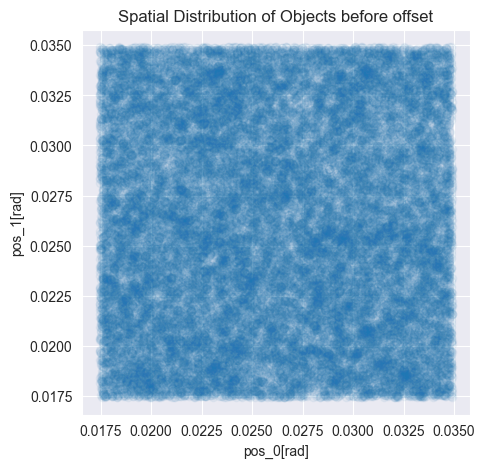

In [24]:
import matplotlib.pyplot as plt

df_sample = df.sample(frac=0.10)

# Create a scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(df_sample['pos_0[rad]'], df_sample['pos_1[rad]'], alpha=0.05)
plt.xlabel('pos_0[rad]')
plt.ylabel('pos_1[rad]')
plt.title('Spatial Distribution of Objects before offset')
plt.grid(True)
plt.show()

In [57]:
# Function to convert square degrees to square radians
def sq_deg_to_sq_rad(sq_deg):
    return sq_deg * (np.pi / 180) ** 2

# Function to calculate the radius from the area
def radius_from_area(area):
    return np.sqrt(area / np.pi)

# Convert the area from square degrees to square radians
area_in_sq_rad = sq_deg_to_sq_rad(0.00082)

# Calculate the radius of the circle
radius = radius_from_area(area_in_sq_rad)
print(f"Radius: {radius} rad")

Radius: 0.00028197418977978086 rad


In [58]:
# Selecting objects within the specified area
selected_objects = df[df.apply(lambda row: np.sqrt(row['pos_0[rad]']**2 + row['pos_1[rad]']**2) <= radius, axis=1)]

# Displaying the results
print(f"Radius: {radius}")
print(f"Number of selected objects: {len(selected_objects)}")
selected_objects.head()  # Display the first few rows of the selected objects

Radius: 0.00028197418977978086
Number of selected objects: 332


,GalID,HaloID,SubhaloID,Type,PlaneNumber,z_spec,pos_0[rad],pos_1[rad],Dc_los[Mpc/h],M_Halo[M_sol/h],M_Subhalo[M_sol/h],M_Stellar[M_sol/h],mag_SDSS_u,mag_SDSS_g,mag_SDSS_r,mag_SDSS_i,mag_SDSS_z,mag_J,mag_H,mag_K
16838,411000165121184,411000165050605,30041100002075,0,30,2.44142,0.000050,-0.000211,4238.57,6.050420e+11,6.050420e+11,3.460800e+09,24.9767,24.7379,24.7419,24.7847,24.8490,24.6430,24.0636,23.9734
16857,102017915000511,102017915000285,30040900007985,0,30,2.35695,-0.000194,0.000078,4158.59,4.561480e+10,4.561480e+10,7.330240e+08,26.3842,25.9736,25.8780,25.8943,25.9004,25.6467,25.1079,25.1016
16858,411000165135860,411000165059601,30041100002357,1,30,2.44339,0.000091,0.000202,4231.78,2.194670e+11,8.864770e+10,2.500380e+09,26.9854,26.2409,25.9882,25.9208,25.8769,25.2632,24.3936,24.2746
16863,409011274000115,409011274000063,30040900008081,0,30,2.36779,-0.000247,-0.000121,4167.36,9.381160e+10,9.381160e+10,9.848460e+08,27.0352,26.1190,25.9008,25.8632,25.8417,25.4300,24.7232,24.7318
16866,411000165152433,411000165074303,30041100002895,0,30,2.44321,-0.000057,0.000042,4235.52,3.227460e+11,3.227460e+11,7.658570e+09,26.9915,26.0022,25.6036,25.5467,25.3218,24.5215,23.6252,23.4315


In [60]:
from astropy.table import Table
import pandas as pd
import numpy as np

# Assuming 'selected_objects' is already created from your previous steps
# Filter the required columns
filtered_data = selected_objects[['z_spec', 'M_Halo[M_sol/h]', 'pos_0[rad]', 'pos_1[rad]']]

# Convert the filtered DataFrame to an Astropy Table
astropy_table = Table.from_pandas(filtered_data)

# Add custom headers/labels if needed
# For example, to rename the columns:
astropy_table.rename_column('z_spec', 'Redshift')
astropy_table.rename_column('M_Halo[M_sol/h]', 'Halo Mass')
astropy_table.rename_column('pos_0[rad]', 'Position 0')
astropy_table.rename_column('pos_1[rad]', 'Position 1')

center_point = (0.0, 0.0)  # Replace with your actual center point
astropy_table.meta['Center_Point'] = center_point

# Display the table
print(astropy_table)
print("Metadata:", astropy_table.meta)

# If you need to save this table to a file, you can do so in various formats, e.g., CSV, FITS
# astropy_table.write('output_file.csv', format='csv')


Redshift    Halo Mass           Position 0              Position 1      
-------- --------------- ----------------------- -----------------------
 2.44142  605042000000.0  5.0200000000000244e-05 -0.00021099999999999938
 2.35695   45614800000.0 -0.00019380000000000092   7.810000000000109e-05
 2.44339  219467000000.0   9.110000000000021e-05   0.0002021000000000002
 2.36779   93811600000.0  -0.0002469000000000013 -0.00012140000000000067
 2.44321  322746000000.0  -5.729999999999971e-05   4.219999999999918e-05
 2.44151  144590000000.0  -7.309999999999955e-05   0.0001337999999999999
  2.4458 4262830000000.0   3.720000000000112e-05  -0.0002559999999999993
 2.44122  226353000000.0   8.600000000000968e-06    5.45999999999984e-05
 2.46251  158361000000.0  0.00022819999999999785  0.00010390000000000052
 2.44295 2038040000000.0 -3.3299999999999996e-05  0.00010589999999999905
     ...             ...                     ...                     ...
0.880075   17213100000.0  4.0100000000001246e-05 -0

In [1]:
from slsim.Halos.read_millennium import ReadMS
from slsim.Halos.ms_halos_lens import HalosMSLens
from astropy.cosmology import default_cosmology

cosmology= default_cosmology.get()
ReadMS = ReadMS( file_path=None,
            selecting_area=0.00082,
            z_source=5,
            cosmo=None,
            sample_size=1,)
tables=ReadMS.get_tables()
print(tables)


C:\Users\TXZ27\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


[<Table length=258>
   z           mass               px                  py        
float64      float64           float64             float64      
-------- --------------- ------------------- -------------------
 0.42683   62890578940.0   -24.6926504267195   50.87747107049278
 2.23748   66384541340.0    22.6863755682384   5.375454812383756
 2.25366  182848443600.0  46.221189961032586 -2.4626078250058723
 2.24625  154897421000.0 -31.458136071624157   -9.14558754741218
 2.22736  103070537600.0  22.748255010112878  -50.62544008370309
0.596061   43674056380.0 -29.643005776649755   23.25861351400672
0.577895   58814334580.0  -54.02350587505631  3.0034095405419228
 0.59092  158973259400.0  -5.571902887613436  3.2715537886629873
0.624323   11064101500.0  -46.88674357890694   7.417476394230048
 0.59157   32027605260.0  -42.53455616709329   34.85069562509339
     ...             ...                 ...                 ...
0.682572  318529071400.0   35.41291411368452   22.72232501776459
0.721

In [5]:
from slsim.Halos.ms_calculating import calculate_kappa_gamma_with_muiltprocessing
from astropy.cosmology import default_cosmology

cosmology= default_cosmology.get()

all_kappa, all_gamma=   calculate_kappa_gamma_with_muiltprocessing(file_path=None,
                                               selecting_area=0.00082,
                                               z_source=5,
                                               cosmo=cosmology,
                                               sample_size=600,
                                               gamma12=False,
                                               diff=0.000001,
                                               diff_method="square")

In [6]:
print(all_kappa, all_gamma)

[0.20553655566413198, 0.18665999770850483, 0.2962929326888464, 0.35259654473929203, 0.2671419140898301, 0.5344588199229783, 0.1860430674099911, 0.5421684877628813, 0.40126737288481706, 0.36324478228100254, 0.12981563428382525, 0.17579322464378322, 0.5083112393222677, 0.508142811495027, 0.16345821955351947, 0.46243776630205957, 0.2148159155002105, 0.8135416122989625, 0.14554522331788888, 0.24094593570334055, 0.24376568714956637, 0.34838256268709955, 0.8123097405832169, 0.9330931325379765, 0.8217313340885823, 0.5848787346662832, 0.6791479684187252, 0.11866037630259285, 0.12400006138557629, 0.6064211448553181, 0.5605673578656933, 0.3796751231188722, 0.0844479768336015, 0.12285795347732886, 0.11433079608047514, 0.4562482903702758, 0.1143700590067187, 0.7591052568201029, 0.5434387406744179, 0.6188685907626557, 0.4099287407299812, 0.14937445513840686, 0.5939328109327846, 0.4215000992680018, 0.31635200403723474, 0.6323909600425281, 0.5329448122814995, 0.6781311086001551, 0.8309941450512781, 0

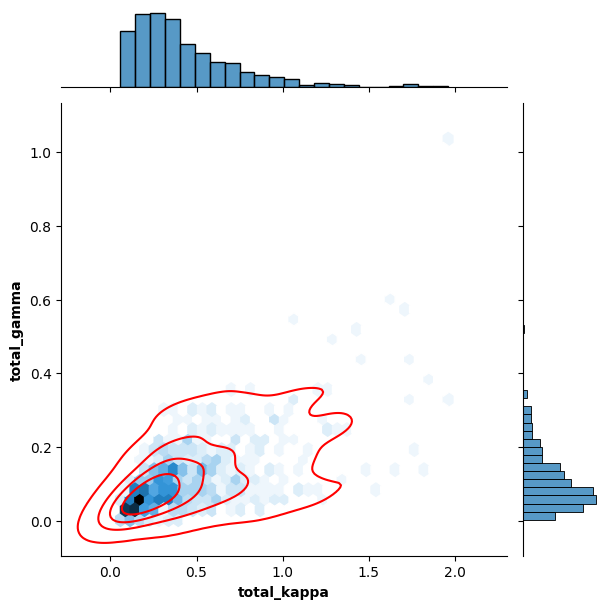

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

all_kappa_flat = np.concatenate(all_kappa) if isinstance(all_kappa[0], np.ndarray) else np.hstack(all_kappa)
all_gamma_flat = np.concatenate(all_gamma) if isinstance(all_gamma[0], np.ndarray) else np.hstack(all_gamma)

# Apply the condition all_kappa_flat < 2
filtered_kappa = all_kappa_flat[all_kappa_flat < 2]
filtered_gamma = all_gamma_flat[all_kappa_flat < 2]

# Create the joint plot
filtered_plot = sns.jointplot(x=filtered_kappa, y=filtered_gamma, kind='hex')
filtered_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
filtered_plot.ax_joint.set_xlabel('total_kappa', fontweight='bold')
filtered_plot.ax_joint.set_ylabel('total_gamma', fontweight='bold')
plt.show()

In [12]:
from slsim.Halos.ms_calculating import get_halos_mass_with_muiltprocessing

ms_all_masses, ms_all_zs, ms_number = get_halos_mass_with_muiltprocessing(file_path=None, selecting_area=0.00082, z_source=2.0, cosmo=None, mass_cut=1e12, sample_size=600)


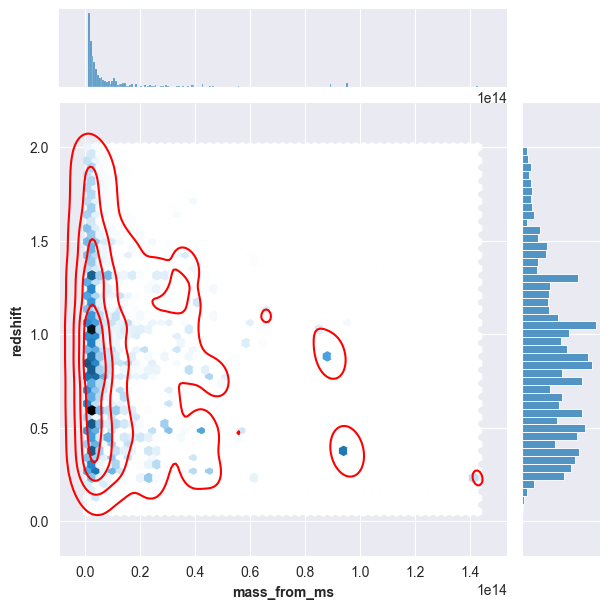

[25, 11, 53, 35, 18, 11, 30, 25, 36, 39, 21, 25, 18, 54, 18, 42, 39, 15, 14, 9, 30, 7, 58, 18, 20, 41, 45, 24, 22, 31, 50, 48, 82, 37, 27, 53, 34, 51, 22, 19, 42, 37, 70, 70, 32, 33, 109, 39, 66, 10, 22, 8, 42, 41, 42, 17, 33, 60, 51, 66, 7, 16, 38, 42, 15, 52, 24, 85, 16, 26, 32, 30, 86, 19, 25, 41, 49, 27, 39, 43, 67, 33, 16, 33, 56, 21, 42, 7, 27, 19, 15, 62, 21, 42, 65, 49, 65, 35, 35, 24, 38, 29, 45, 31, 36, 36, 78, 48, 37, 25, 33, 70, 38, 44, 33, 18, 76, 50, 35, 25, 19, 34, 18, 36, 25, 28, 28, 25, 38, 53, 13, 38, 15, 37, 46, 40, 72, 27, 14, 15, 46, 69, 48, 34, 62, 32, 34, 64, 57, 40, 40, 27, 57, 49, 24, 45, 40, 32, 18, 46, 62, 20, 29, 82, 55, 24, 39, 26, 61, 35, 75, 21, 38, 43, 18, 33, 66, 22, 37, 35, 63, 37, 52, 48, 45, 40, 15, 42, 49, 35, 25, 42, 54, 56, 42, 17, 11, 7, 91, 48, 40, 44, 33, 36, 45, 31, 29, 71, 26, 42, 13, 53, 37, 21, 24, 27, 73, 31, 61, 40, 60, 49, 36, 53, 62, 35, 48, 35, 13, 51, 44, 36, 27, 21, 62, 37, 27, 37, 58, 26, 15, 32, 26, 55, 12, 14, 29, 29, 41, 22, 36, 

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create the joint plot
plot_ms_halos = sns.jointplot(x=ms_all_masses, y=ms_all_zs, kind='hex')
plot_ms_halos.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
plot_ms_halos.ax_joint.set_xlabel('mass_from_ms', fontweight='bold')
plot_ms_halos.ax_joint.set_ylabel('redshift', fontweight='bold')
plt.show()

print(ms_number)

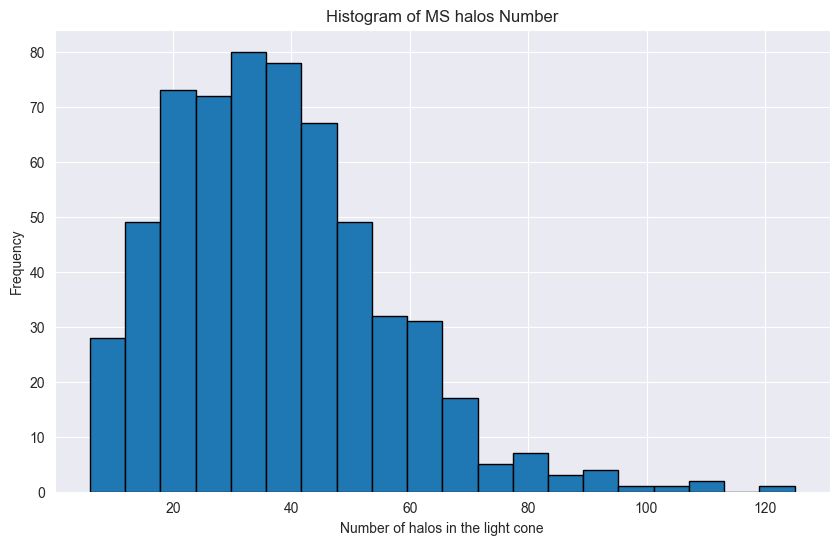

In [14]:
plt.figure(figsize=(10, 6)) 
plt.hist(ms_number, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of MS halos Number')
plt.xlabel('Number of halos in the light cone')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [15]:
from slsim.Halos.halos_plus_glass import run_halos_by_multiprocessing


all_masses_rendering, all_zs_rendering, all_lengths_rendering = run_halos_by_multiprocessing(m_min_str='1.0E+12',
                                                m_max_str='1.0E+16',
                                                m_min=1e12,
                                                m_max=1e16,
                                                z_max=2.0,
                                                n_iterations=600,
                                                sky_area=0.0001)
print( all_masses_rendering, all_zs_rendering, all_lengths_rendering)

The 600 halo-lists took 1164.99542927742 seconds to run
[5200441222416.763, 1377607466699.3762, 1307485318410.301, 2183752554081.9592, 3666407791144.6284, 1224994642243.0864, 3889265230615.585, 8115608374501.829, 4924462221618.585, 5612942550494.646, 1183313527177.1243, 1052771873939.1099, 1437039942572.9036, 1284793039602.1418, 2611642017211.734, 1327844719387.5354, 5010691454983.482, 8746440626310.941, 1053413089902.3933, 5676252199573.343, 2152178750466.1904, 1026289476281.8762, 3920488065528.0195, 1693564905222.4731, 3845126502425.891, 2098660235472.381, 2130356990502.181, 9876770626765.223, 16110537042867.145, 1195499107694.5234, 5647757360262.663, 2781525340854.9473, 9650416250943.797, 4433060326033.231, 1932507241864.859, 1468730483209.4924, 1664994492034.926, 2124758089864.0623, 1533023464197.9148, 1283206284386.8018, 2273512520919.0356, 2518619987792.8955, 3695038808705.9116, 2335844281221.956, 1064323788332.3297, 1031390660666.1198, 2191934599385.892, 2688803609783.75, 186692

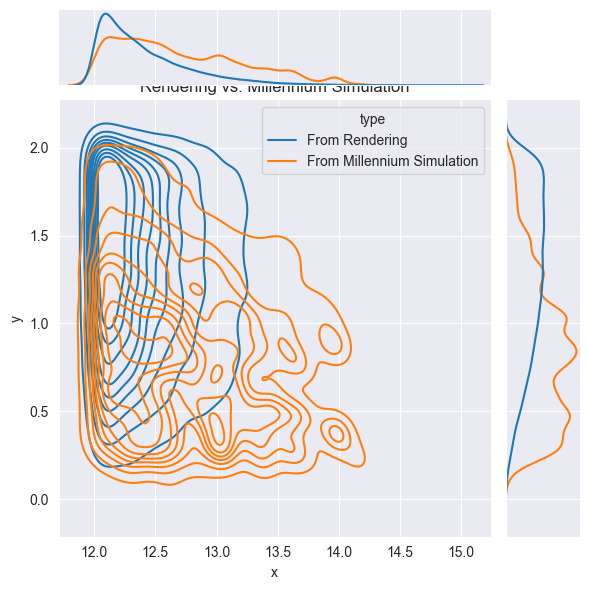

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
log_all_masses_rendering = np.log10(all_masses_rendering)
log_ms_all_masses = np.log10(ms_all_masses)
df1 = pd.DataFrame({'x': log_all_masses_rendering, 'y': all_zs_rendering, 'type': 'From Rendering'})
df2 = pd.DataFrame({'x': log_ms_all_masses, 'y': ms_all_zs, 'type': 'From Millennium Simulation'})

# Concatenate DataFrames
df_total = pd.concat([df1, df2], axis=0)

sns.jointplot(data=df_total, x="x", y="y", hue="type", kind="kde")
plt.title('Rendering vs. Millennium Simulation')
plt.show()

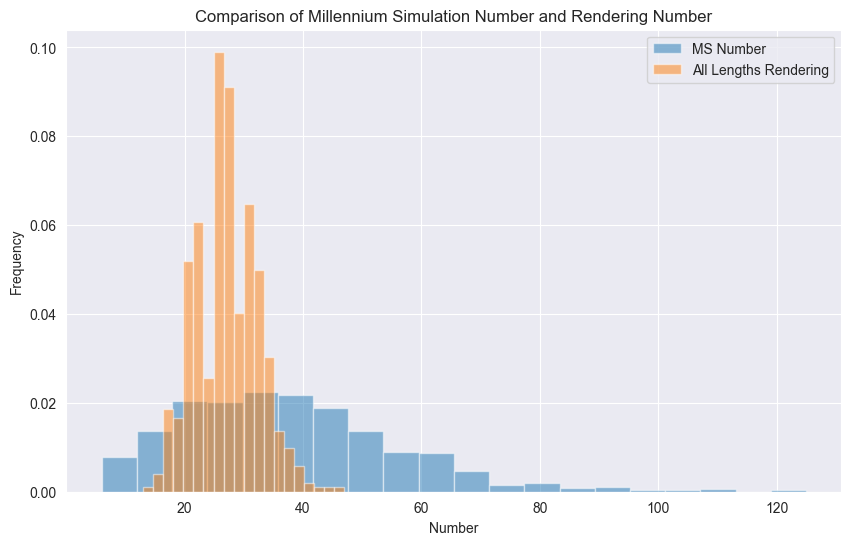

In [19]:
plt.figure(figsize=(10, 6))

# Plot the histograms
plt.hist(ms_number, bins=20, alpha=0.5, density=True, label='MS Number')
plt.hist(all_lengths_rendering, bins=20, alpha=0.5, density=True, label='All Lengths Rendering')

plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Comparison of Millennium Simulation Number and Rendering Number')
plt.legend()  
plt.show()